# SPAM CLASSIFIER

In [82]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
#reading the file
mails=pd.read_csv('spam.csv',encoding='latin-1')
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [84]:
#dropping unnecessary columns and renaming the columns
#representing ham as "0" and spam as "1" 
mails=mails.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
mails=mails.rename(columns={"v1":"label","v2":"message"})
mails.label=mails.label.replace({"ham":"0","spam":"1"})
mails

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [85]:
#checking if missing values are present
mails.describe()
#count of both features is same

,label,message
count,5572,5572
unique,2,5169
top,0,"Sorry, I'll call later"
freq,4825,30


In [86]:
#checking for duplicate values
mails.duplicated()
#there are some duplicate values represented as 'true'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5542    False
5543    False
5544    False
5545    False
5546    False
5547    False
5548    False
5549    False
5550    False
5551    False
5552    False
5553     True
5554    False
5555    False
5556    False
5557    False
5558     True
5559    False
5560    False
5561    False
5562    False
5563    False
5564    False
5565    False
5566    False
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [87]:
#counting no of duplicate values
mails.duplicated().value_counts()

False    5169
True      403
dtype: int64

In [88]:
mails.loc[mails.duplicated()]

,label,message
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
338,0,"Sorry, I'll call later"
356,1,Congratulations ur awarded 500 of CD vouchers ...
443,0,"Sorry, I'll call later"
532,0,Gudnite....tc...practice going on
654,0,Did u got that persons story


In [89]:
#removing duplicate values 
mails=mails.drop_duplicates()
mails.describe()

,label,message
count,5169,5169
unique,2,5169
top,0,"We are hoping to get away by 7, from Langport...."
freq,4516,1


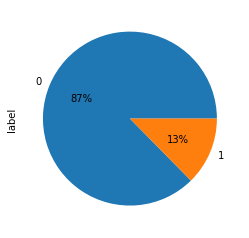

In [91]:
#plotting no of ham and spam texts
count=pd.value_counts(mails['label'])
count.plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [92]:
#seperating the data into two different dataframes
ham_mails=mails[mails['label']=='0']
spam_mails=mails[mails['label']=='1']

In [93]:
#using countvectorizer to count frequency of each word after removal of stopwords 
from sklearn.feature_extraction.text import CountVectorizer
ham_vectorizer = CountVectorizer(stop_words='english')
spam_vectorizer = CountVectorizer(stop_words='english')
ham_=ham_vectorizer.fit_transform(ham_mails['message'])
spam_=spam_vectorizer.fit_transform(spam_mails['message']) 

In [94]:
#extracting feature names and frequency and converting into dictionary
ham_word=ham_vectorizer.get_feature_names()
ham_freqs=ham_.sum(axis=0).A1
ham_result=dict(zip(ham_word,ham_freqs))
print(len(ham_word))

6589


In [95]:
spam_word=spam_vectorizer.get_feature_names()
spam_freqs=spam_.sum(axis=0).A1
spam_result=dict(zip(spam_word,spam_freqs))
print(len(spam_word))

2699


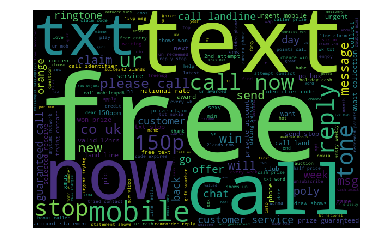

In [96]:
#wordcloud for spam texts
from wordcloud import WordCloud
spam_words=''
for mag in mails[mails['label']=='1']['message']:
    mag=mag.lower()
    spam_words+=mag+' '
spam_wc=WordCloud(width=600,height=400).generate(spam_words)  
plt.imshow(spam_wc)    
plt.axis('off')
plt.show()

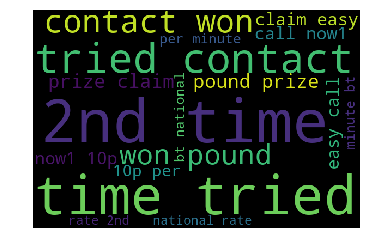

In [97]:
#wordcloud for ham texts
ham_words=''
for mag1 in mails[mails['label']=='0']['message']:
    mag1=mag.lower()
    ham_words+=mag1+' '
ham_wc=WordCloud(width=600,height=400).generate(ham_words)  
plt.imshow(ham_wc)    
plt.axis('off')
plt.show()

In [98]:
#splitting the dataset into train and test data
x=mails['message']
y=mails['label']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [99]:
#vectorizing the dataset
#creating the tf-idf model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(lowercase=True)
train=vectorizer.fit_transform(x_train)
test=vectorizer.transform(x_test)

In [100]:
#classification of data using multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
start=datetime.datetime.now()
model.fit(train,y_train)
stop=datetime.datetime.now()
train_time=start-stop
print(train_time)

-1 day, 23:59:59.924020


In [101]:
start=datetime.datetime.now()
y_pred=model.predict(test)
stop=datetime.datetime.now()
pred_time=start-stop
print(pred_time)

-1 day, 23:59:59.996029


In [102]:
#accuracy of the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(accuracy_score(y_test,y_pred))

0.9484203739522888


In [103]:
print(confusion_matrix(y_test,y_pred))

[[1331    0]
 [  80  140]]


In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1331
           1       1.00      0.64      0.78       220

   micro avg       0.95      0.95      0.95      1551
   macro avg       0.97      0.82      0.87      1551
weighted avg       0.95      0.95      0.94      1551

